# EDA setup

## Appending path to be able to import "predpy" module

In [2]:
import sys
sys.path.append("../")

## Importing

In [3]:
import pandas as pd
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Union, Any, Literal, Tuple
from datetime import datetime

from predpy.preprocessing import (
    load_and_preprocess, set_index, scale, moving_average, drop_if_is_in,
    use_dataframe_func, drop_if_index_is_in, drop_if_index_equals,
    drop_if_equals, loc, iloc)

## Collective variables

In [4]:
split_proportions = [0.8, 0.1, 0.1]
data_dir_path = "../data/"

## Plotting function

In [38]:
def plot_time_series(time_series: pd.DataFrame, columns: List[str] = None):
    if columns is None:
        columns = time_series.columns
    n_cols = len(columns)
    _, axs = plt.subplots(n_cols, figsize=(18, 4*n_cols))

    if n_cols > 1:
        for i, col in enumerate(columns):
            time_series[col].plot(ax=axs[i], ylabel=col);
    else:
        time_series.plot(ax=axs);

# Polutions

In [6]:
topic_path = data_dir_path + "Polutions/"

## AirQualityUCI

In [43]:
ds_path = topic_path + "AirQuality/AirQualityUCI.csv"
load_params = {
    "sep": ";", "header": 0,
    "dtype": 'float', "decimal": ',',
    "parse_dates": {'datetime': [0, 1]}, "index_col": ['datetime'],
}
pipeline = [
    (iloc, {"columns_end": -2}),
    (use_dataframe_func, "dropna"),
    # (scale, split_proportions[0])
]

df = load_and_preprocess(ds_path, load_params, pipeline)

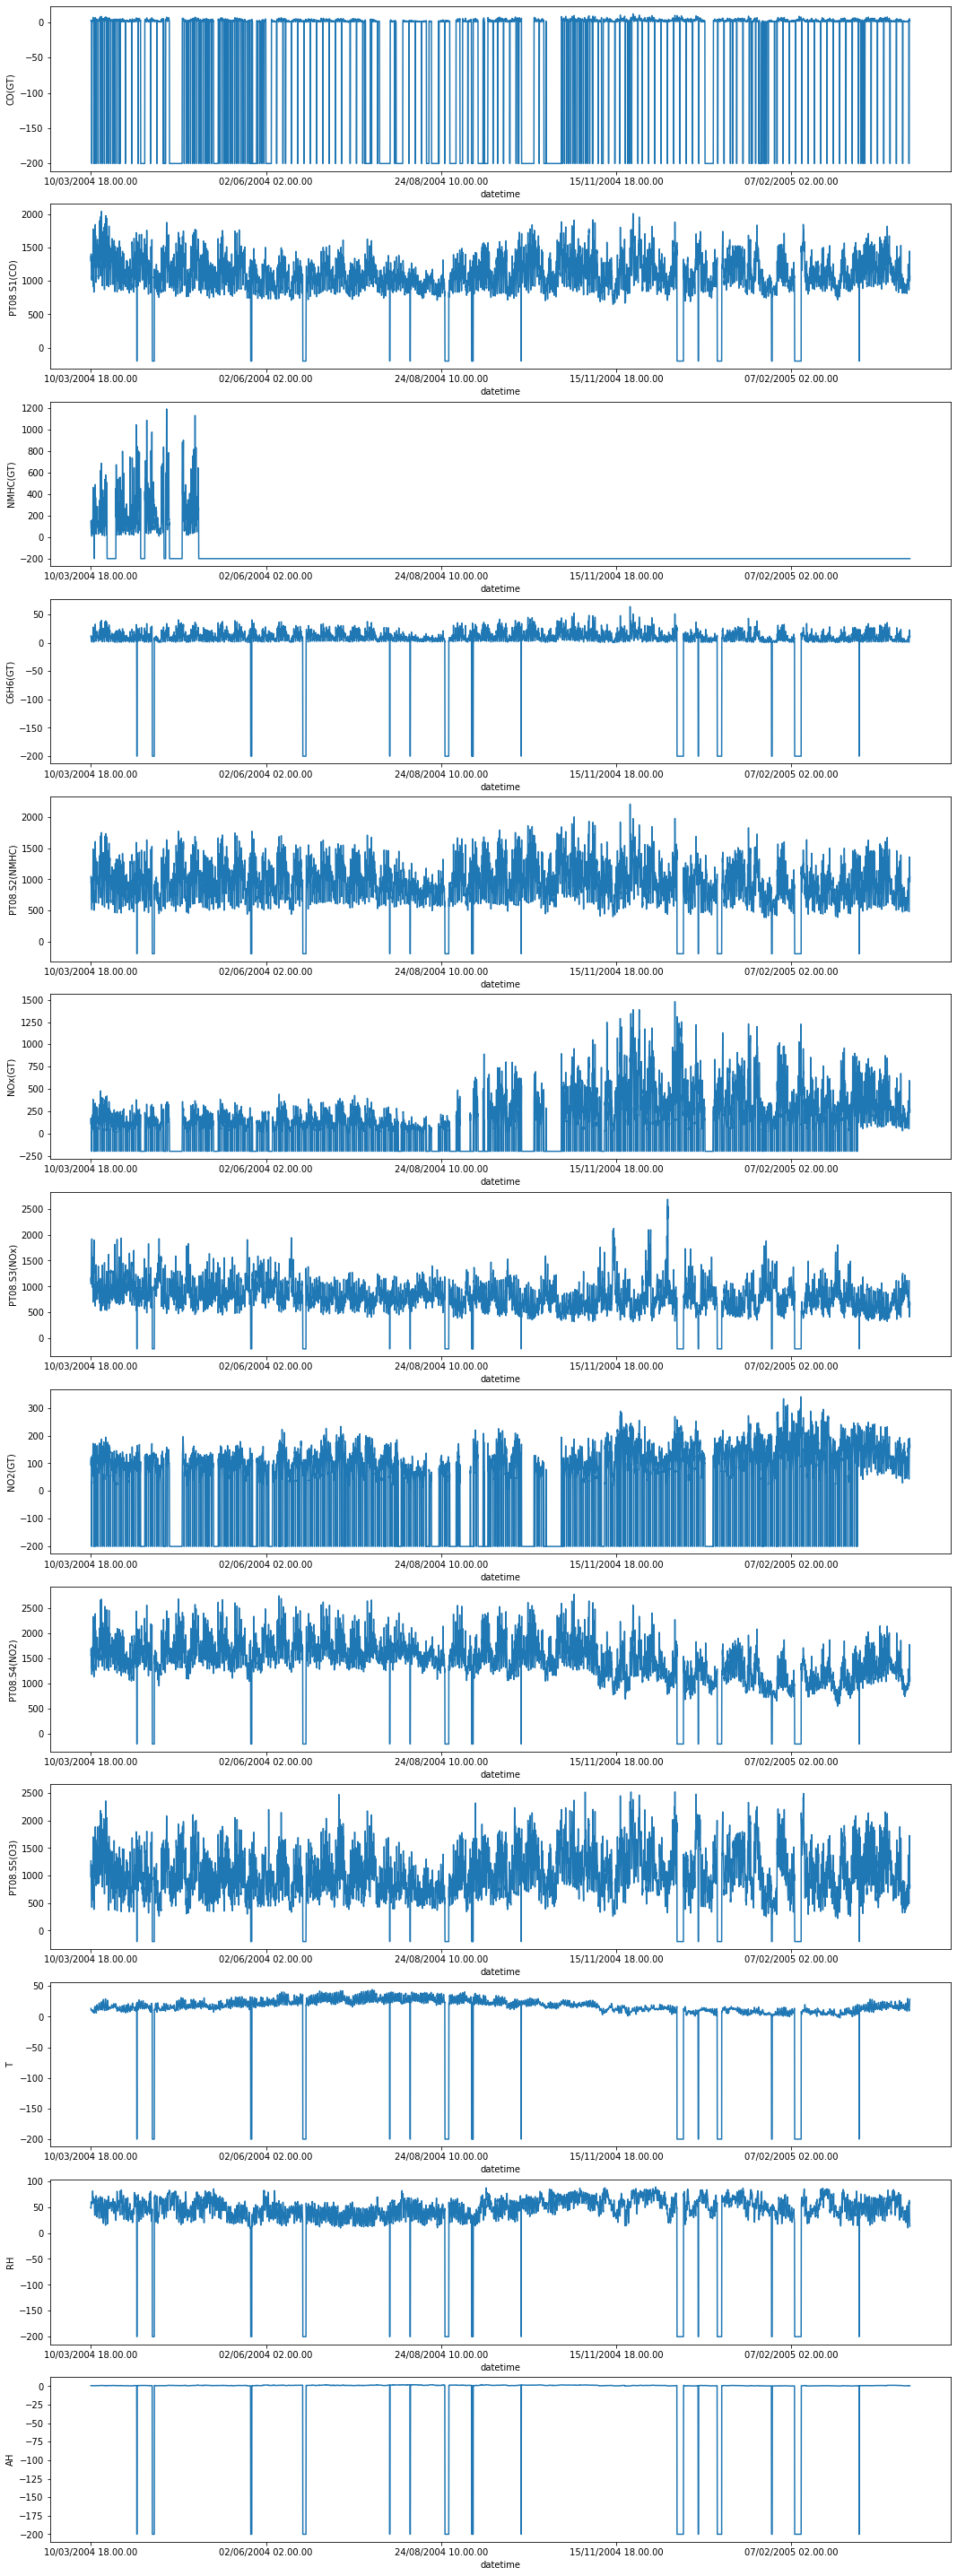

In [44]:
plot_time_series(df)

## FiveCitiesPMData

In [45]:
ds_dir = topic_path + "FiveCitiesPMData/"

### Beijing

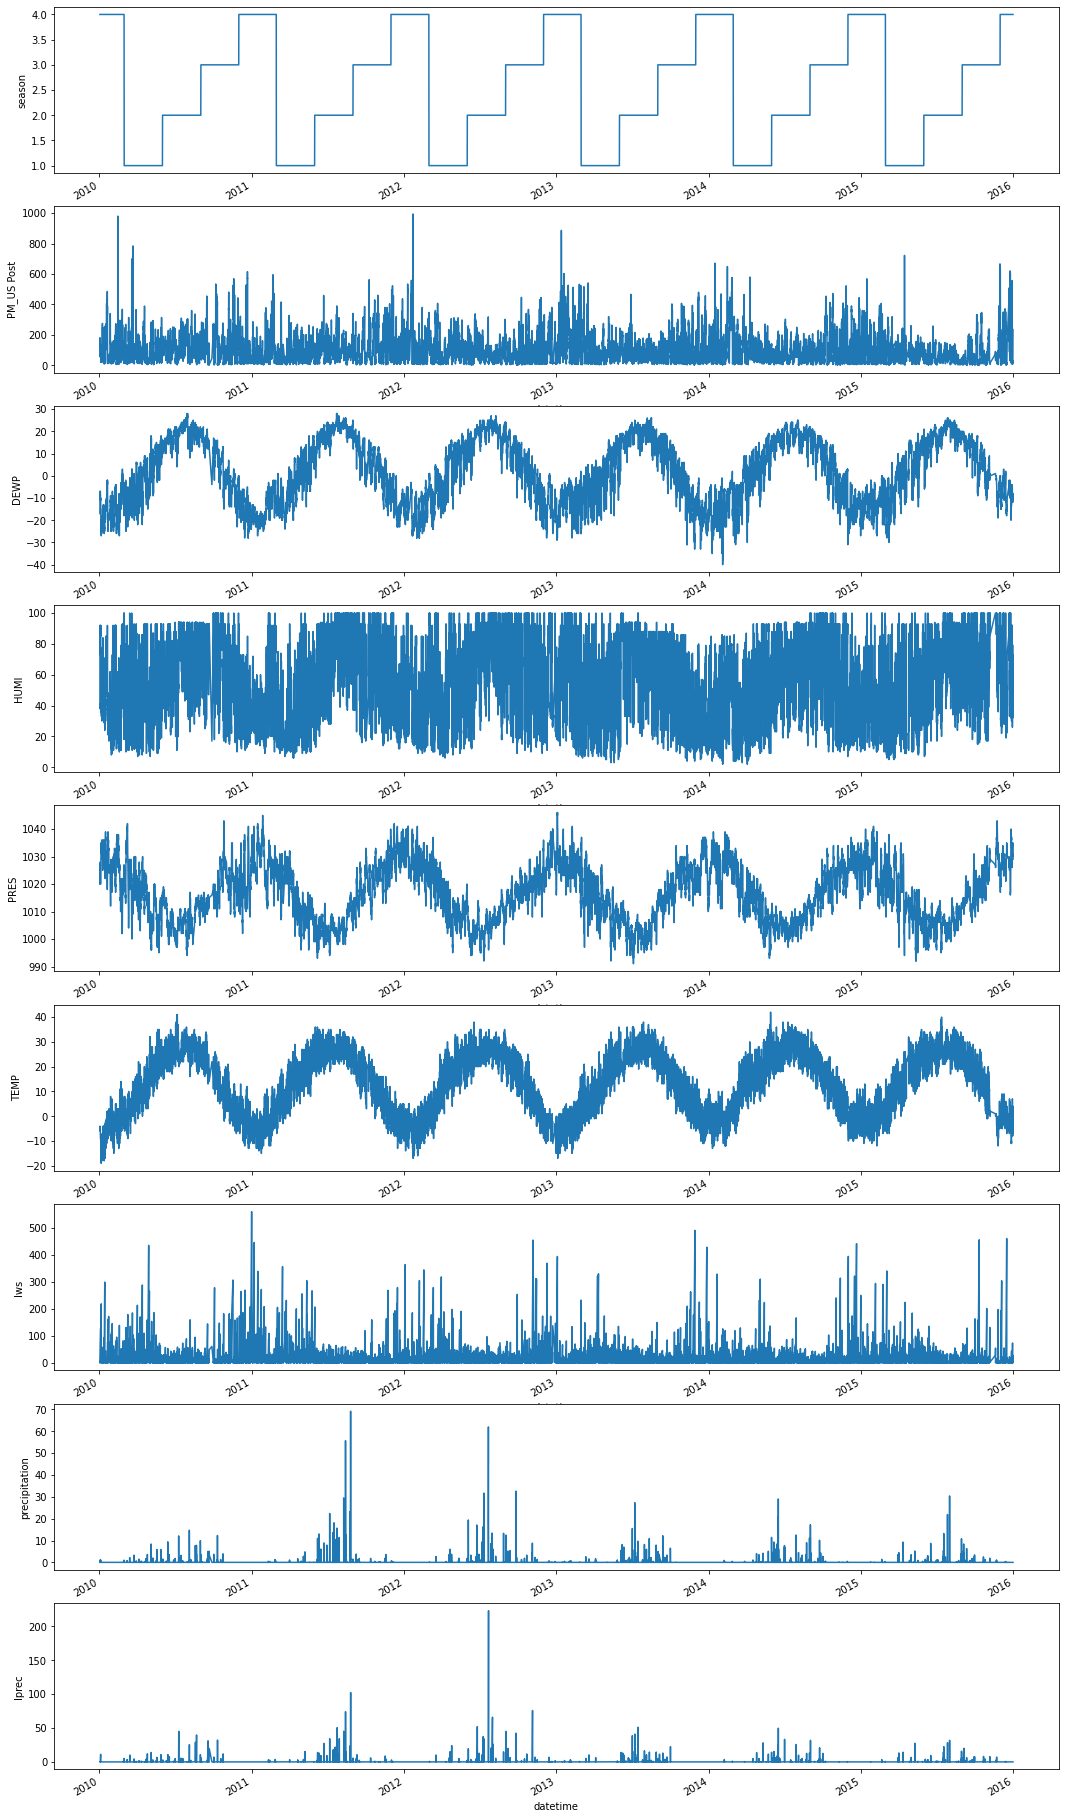

In [46]:
dateparse = lambda x: datetime.strptime(x, '%Y %m %d %H')

ds_path = ds_dir + "BeijingPM20100101_20151231.csv"
load_params = {
    "parse_dates": {'datetime': [1, 2, 3, 4]}, "date_parser": dateparse,
    "index_col": ['datetime']
}
pipeline = [
    (use_dataframe_func, "drop", 
     ['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'No', "cbwd"],
     {"axis": 1}),
    # (iloc, {"columns_end": -2}),
    (use_dataframe_func, "dropna"),
    # (scale, 0.8)
]

df = load_and_preprocess(ds_path, load_params, pipeline)
plot_time_series(df)

### Shanghai

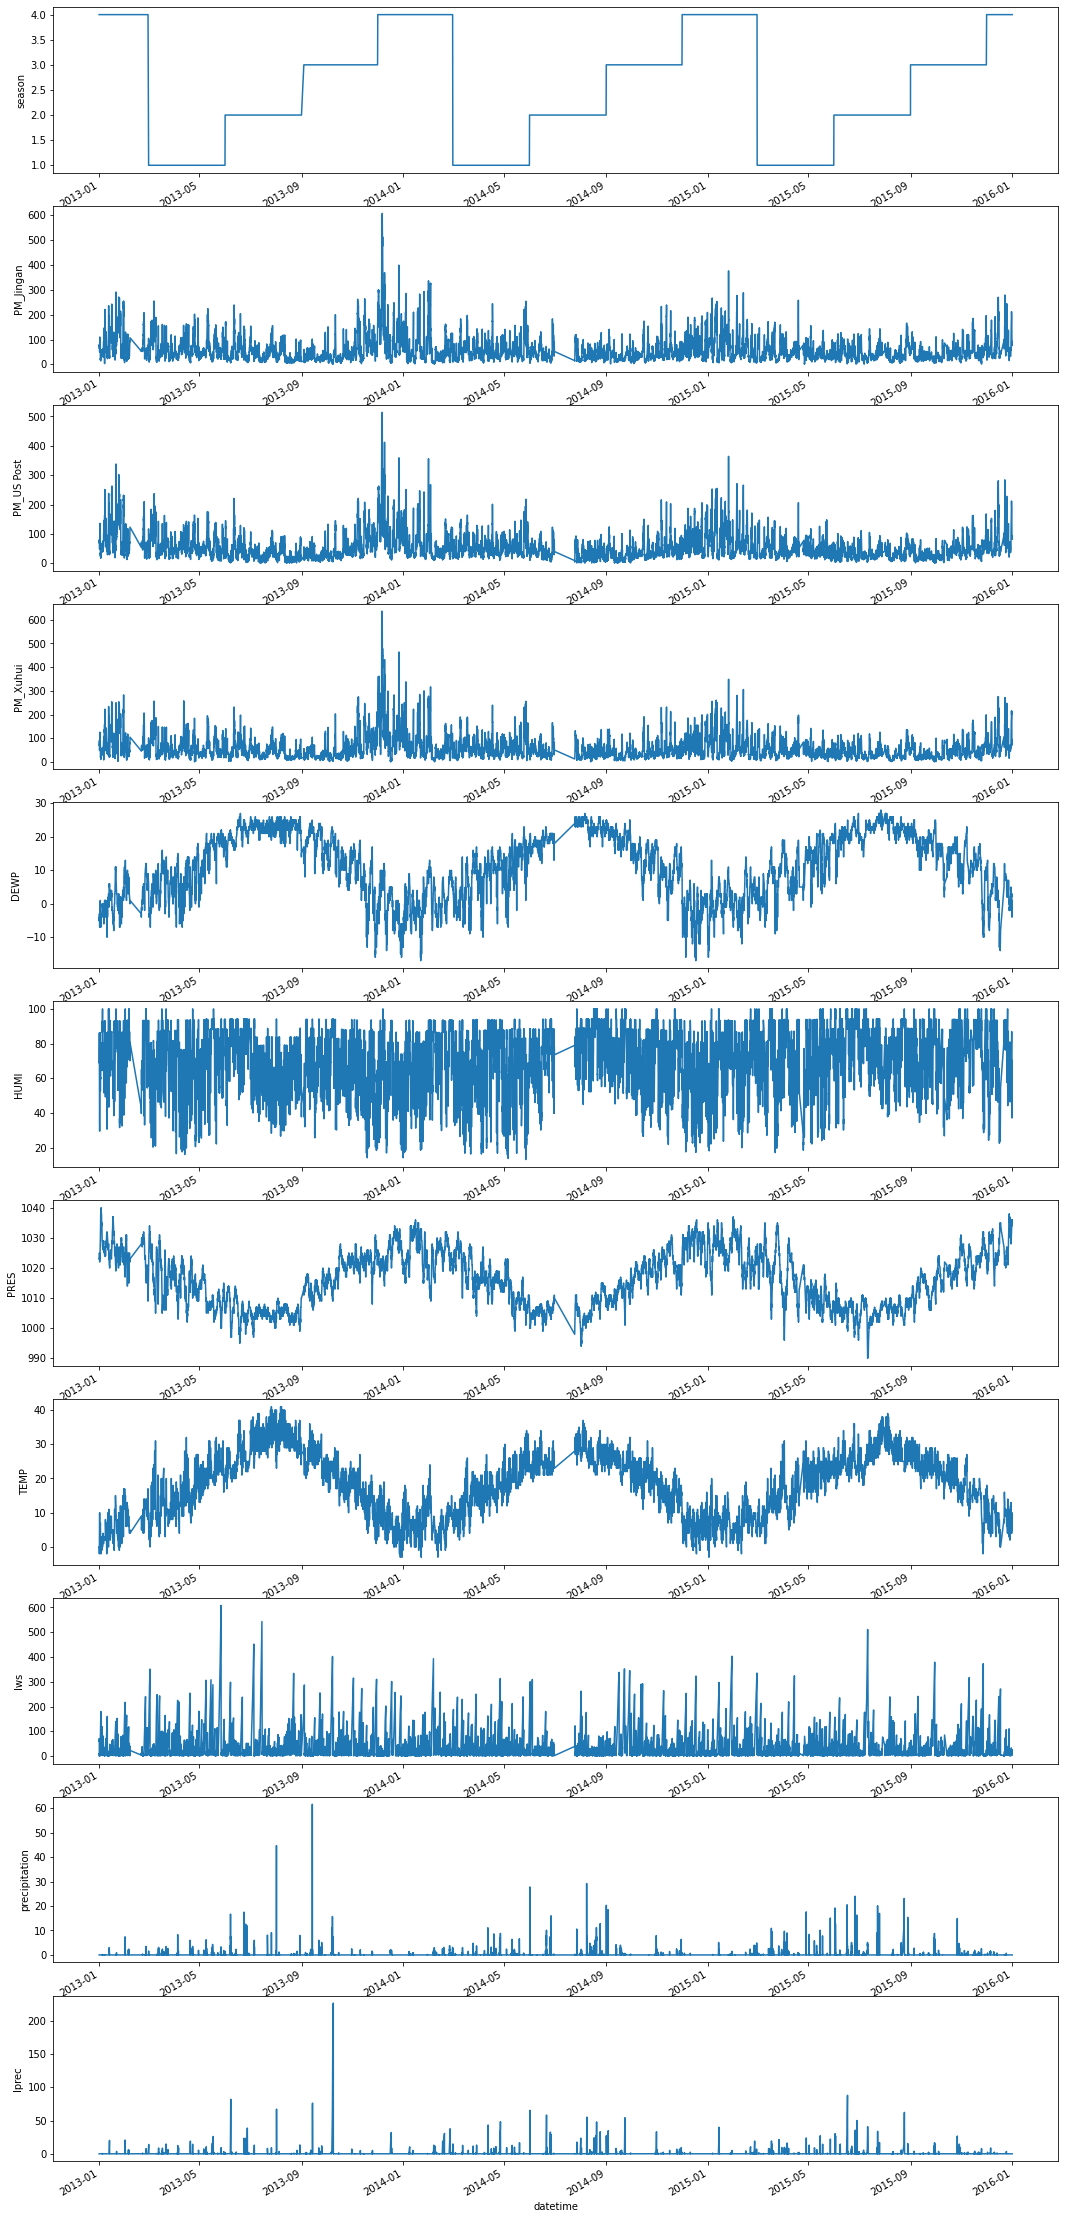

In [52]:
dateparse = lambda x: datetime.strptime(x, '%Y %m %d %H')

ds_path = ds_dir + "ShanghaiPM20100101_20151231.csv"
load_params = {
    "parse_dates": {'datetime': [1, 2, 3, 4]}, "date_parser": dateparse,
    "index_col": ['datetime']
}
pipeline = [
    (use_dataframe_func, "drop", 
     ['No', "cbwd"],
     {"axis": 1}),
    # (iloc, {"columns_end": -2}),
    (use_dataframe_func, "dropna"),
    # (scale, 0.8)
]

df = load_and_preprocess(ds_path, load_params, pipeline)
plot_time_series(df)
# df.dtypes

## Pollution_US

In [43]:
dateparse = lambda x: datetime.strptime(x, '%Y %m %d %H')

ds_path = topic_path + "Pollution_US/pollution_us_2000_2016.csv"
load_params = {
    "header": 0,
    "parse_dates": ["Date Local"],
    # "parse_dates": {'datetime': [1, 2, 3, 4]}, "date_parser": dateparse,
    "index_col": ['Date Local']
}
pipeline = [
    # (iloc, {"columns_end": -2}),
    (use_dataframe_func, "dropna"),
    # (scale, 0.8)
]

df = load_and_preprocess(ds_path, load_params, pipeline)

In [44]:
groups = {"State": [], "City": [], "n_records": []}
for group in df.groupby(
    # ["State Code", "County Code", "Site Num",
    # "Address", "State", "County", "City"]):
    ["State", "City"]):
    groups["State"].append(group[0][0])
    groups["City"].append(group[0][1])
    groups["n_records"].append(group[1].shape[0])
groups = pd.DataFrame(groups).set_index(["State", "City"])
groups[groups["n_records"] > 10000]

n_records
State      City                  
California Los Angeles      10598
New York   New York         11725

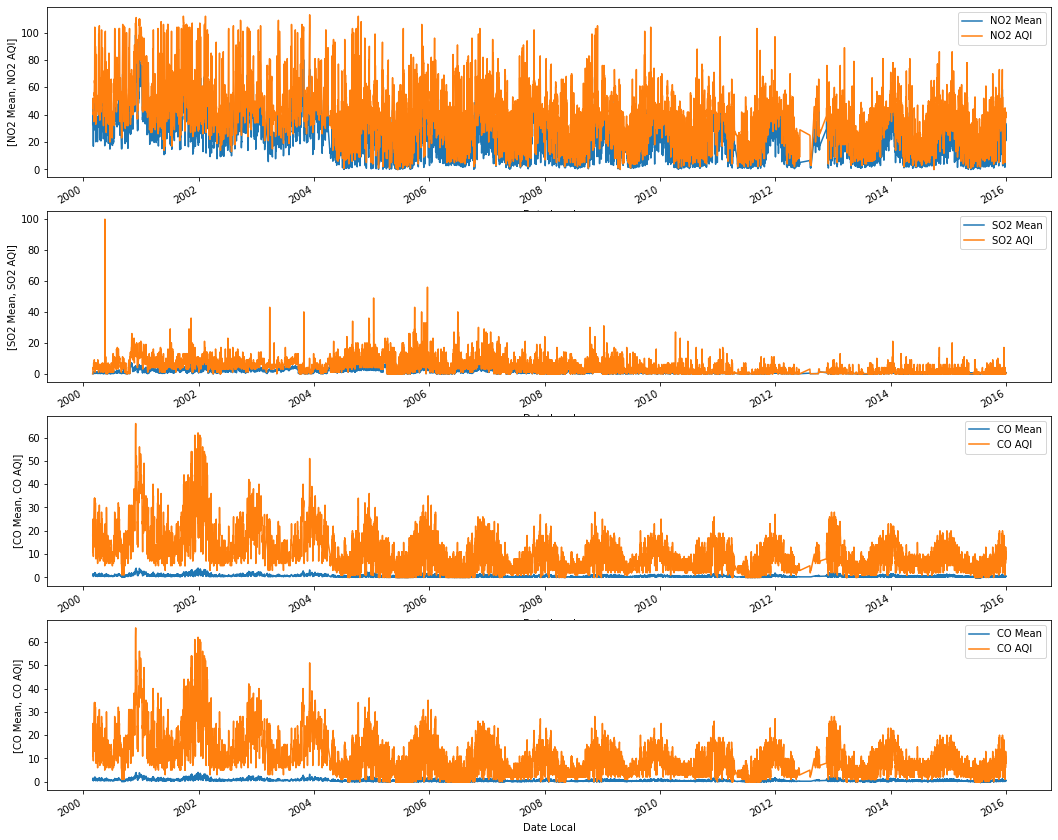

In [46]:
# plot data for Los Angeles
plot_time_series(
    df[(df["State"] == "California") & (df["City"] == "Los Angeles")],
    columns=[["NO2 Mean", "NO2 AQI"], ["SO2 Mean", "SO2 AQI"],
    ["CO Mean", "CO AQI"], ["CO Mean", "CO AQI"]]
)

# Monthly-sunspots

In [31]:
ds_path = "../data/monthly-sunspots.csv"
load_params = {
    "index_col": ['Month']
}
pipeline = [
    (use_dataframe_func, "dropna"),
    (scale, 0.8)
]

df = load_and_preprocess(ds_path, load_params, pipeline)

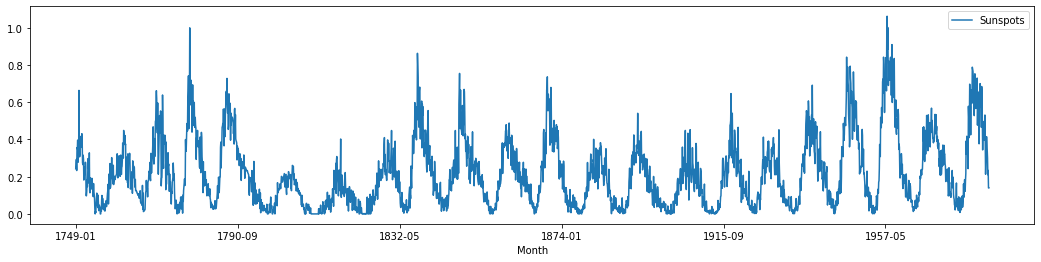

In [32]:
plot_time_series(df)

# Daily-total-female-births

In [38]:
ds_path = "../data/daily-total-female-births.csv"
load_params = {
    "index_col": ['Date']
}
pipeline = [
    # (iloc, {"columns_end": -2}),
    # (use_dataframe_func, "dropna"),
    (scale, 0.8)
]

df = load_and_preprocess(ds_path, load_params, pipeline)

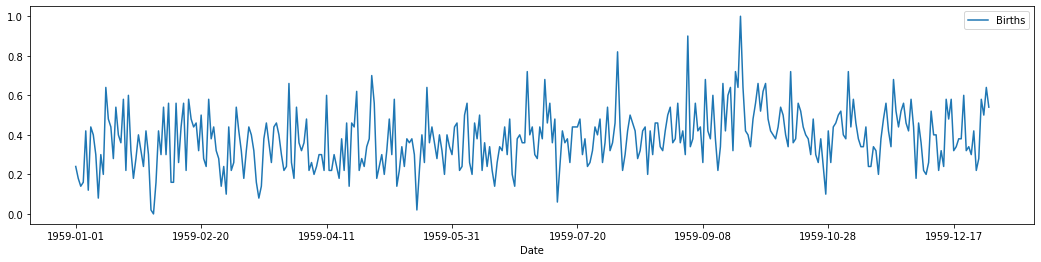

In [37]:
plot_time_series(df)

# Energy

In [48]:
topic_path = data_dir_path + "Energy/"

## Energydata_complete

In [49]:
ds_path = topic_path + "energydata/energydata_complete.csv"
load_params = {
    "parse_dates": ["date"], "index_col": ['date'],
    "dtype": 'float'
}
pipeline = [
    # (iloc, {"columns_end": -2}),
    (use_dataframe_func, "dropna"),
]

df = load_and_preprocess(ds_path, load_params, pipeline)

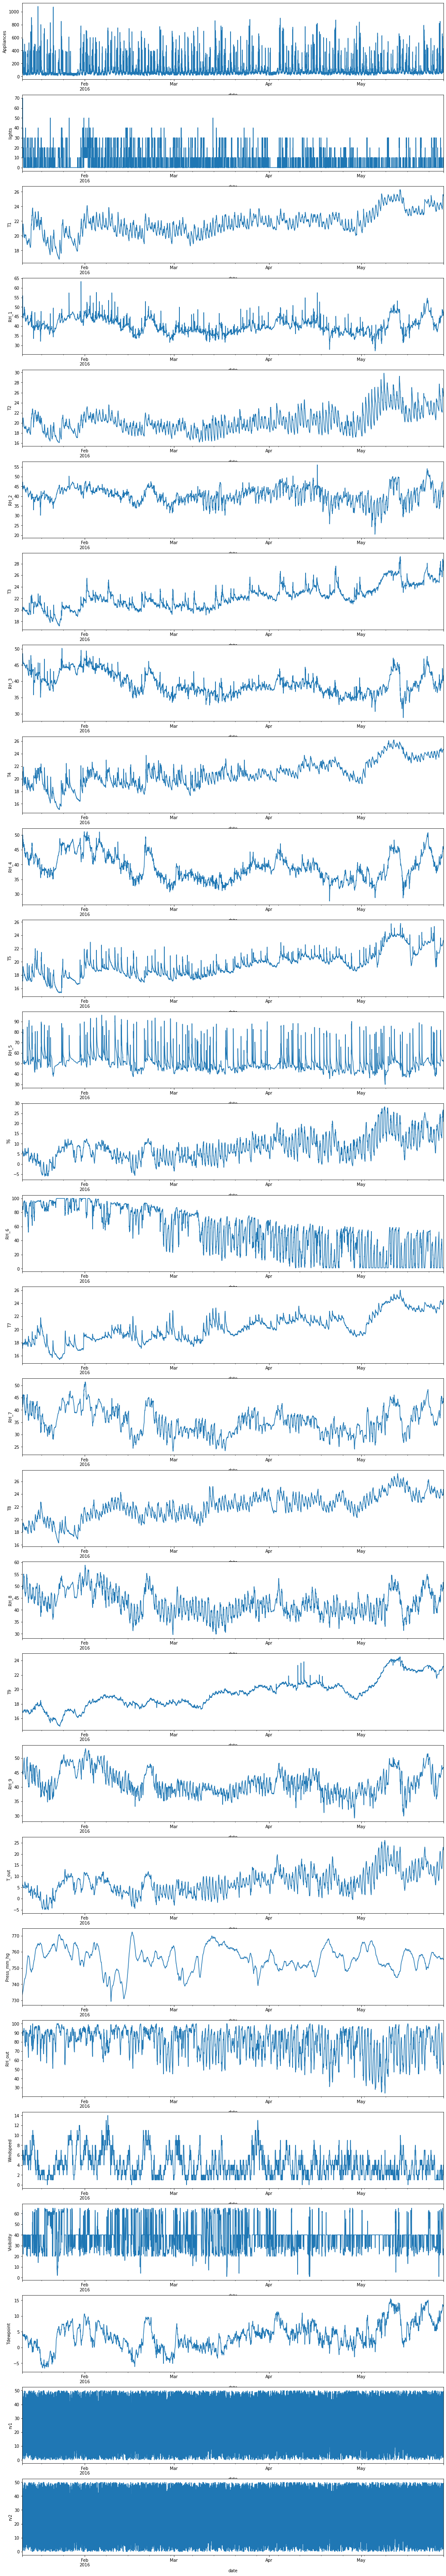

In [50]:
plot_time_series(df)

## household_power_consumption

In [51]:
ds_path = topic_path + "household_power_consumption/household_power_consumption.csv"
load_params = {
    "sep": ';', "header": 0, "low_memory": False,
    "infer_datetime_format": True, "parse_dates": {'datetime': [0, 1]},
    "index_col": ['datetime']
}
pipeline = [
    (drop_if_is_in, (["?", np.nan]), {"columns": ["Global_active_power"]}),
    (use_dataframe_func, "astype", "float"),
    # (select_columns, ["Global_active_power"])
]

df = load_and_preprocess(ds_path, load_params, pipeline)

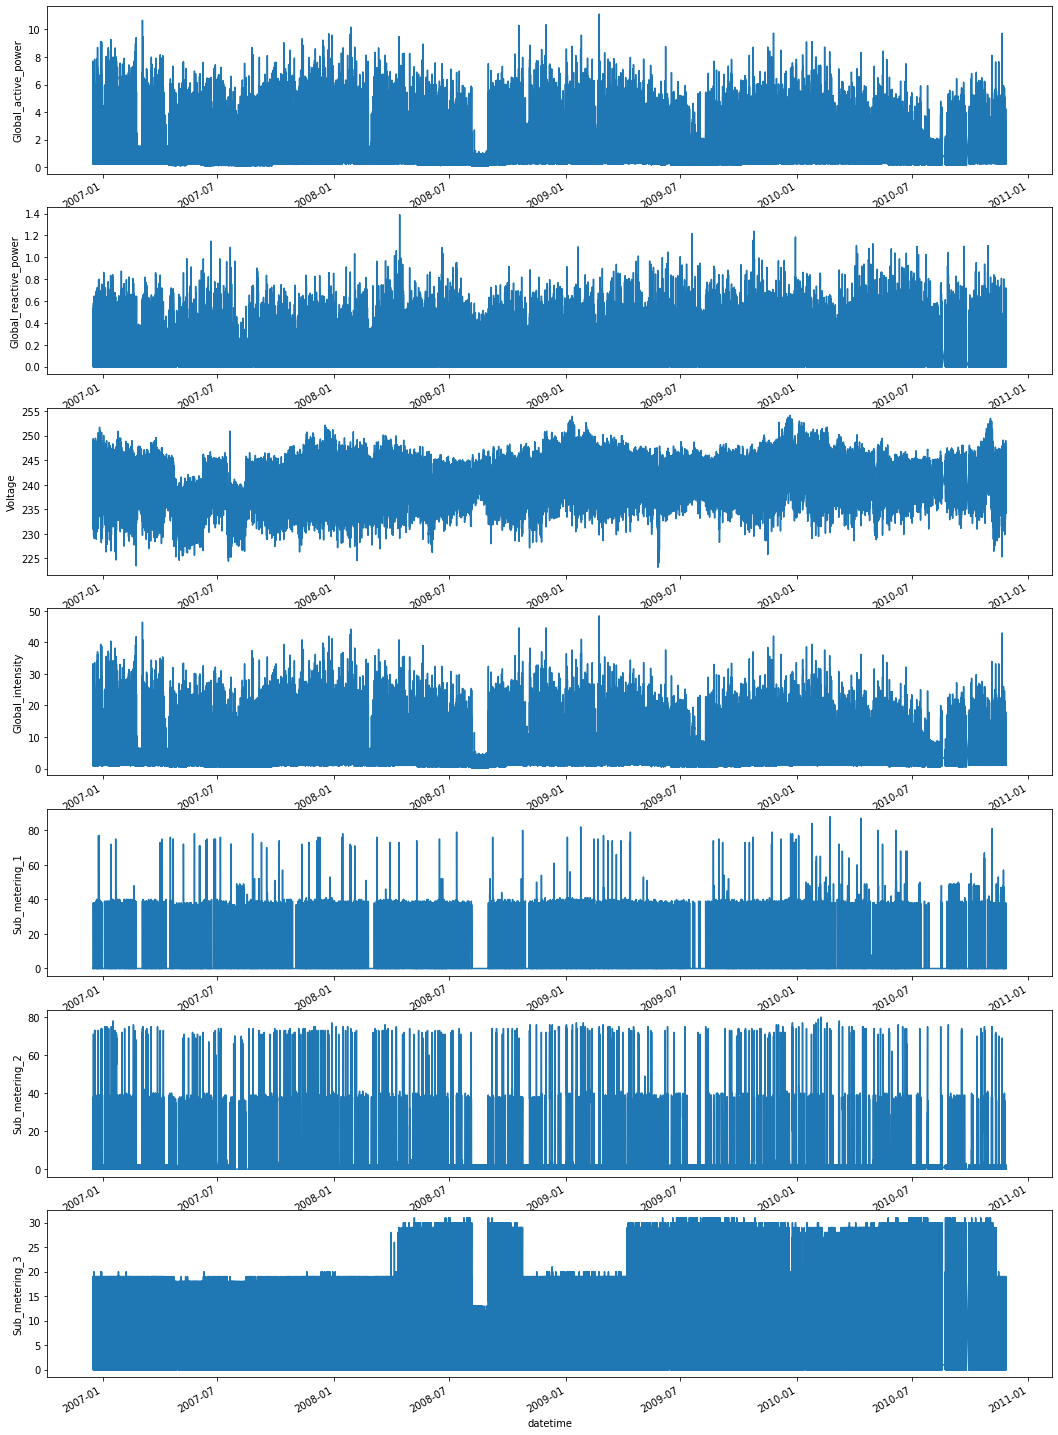

In [52]:
plot_time_series(df)

## LD2011-2014

In [57]:
ds_path = topic_path + "LD2011_2014/LD2011_2014.csv"
load_params = {
    "sep": ';', "header": 0, "low_memory": False,
    "infer_datetime_format": True, "parse_dates": {'datetime': [0]},
    "index_col": ['datetime'], "decimal": ",",  "dtype": "float"
}
pipeline = [
    # (drop_if_is_in, (["?", np.nan]), {"columns": ["Global_active_power"]}),
    # (use_dataframe_func, "astype", "float"),
    # (select_columns, ["Global_active_power"])
]

df = load_and_preprocess(ds_path, load_params, pipeline)

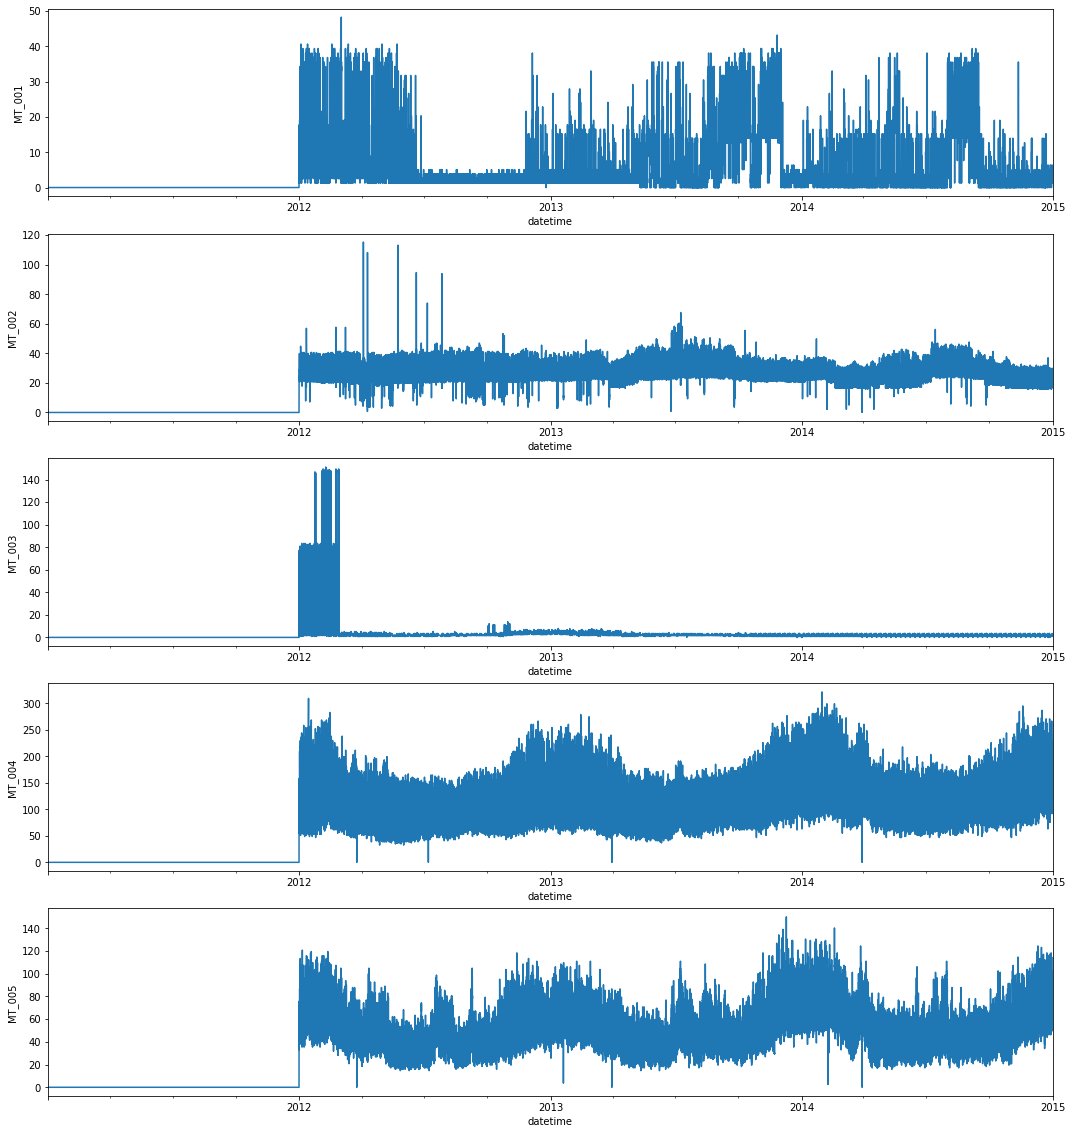

In [68]:
plot_time_series(
    df,
    columns=df.columns[:5]
)

# Social

In [70]:
topic_path = data_dir_path + "Social/"

## Social-media

In [71]:
ds_dir = topic_path + "social-media/"

### Facebook_Economy

In [73]:
ds_path = ds_dir + "Facebook_Economy.csv"
load_params = {
}
pipeline = [
    # (iloc, {"columns_end": -2}),
    # (use_dataframe_func, "dropna"),
    # (scale, 0.8)
]

df = load_and_preprocess(ds_path, load_params, pipeline)
df.head()

IDLink  TS1  TS2  TS3  TS4  TS5  TS6  TS7  TS8  TS9  ...  TS135  TS136  \
0       1   -1   -1   -1   -1   -1   -1   -1   -1    7  ...     13     13   
1       2   -1   -1   -1   -1   -1   -1   -1   -1    3  ...     42     42   
2       3   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...     98     98   
3       4   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...      7      7   
4       5   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...     34     34   

   TS137  TS138  TS139  TS140  TS141  TS142  TS143  TS144  
0     13     13     13     13     13     13     13     13  
1     42     42     42     42     42     42     42     42  
2     98     98     98     98     98     98     98     98  
3      7      7      7      7      7      7      7      7  
4     34     34     34     34     34     34     34     34  

[5 rows x 145 columns]

## Facebook_Microsoft

In [74]:
ds_path = ds_dir + "Facebook_Microsoft.csv"
load_params = {
}
pipeline = [
    # (iloc, {"columns_end": -2}),
    # (use_dataframe_func, "dropna"),
    # (scale, 0.8)
]

df = load_and_preprocess(ds_path, load_params, pipeline)
df.head()

IDLink  TS1  TS2  TS3  TS4  TS5  TS6  TS7  TS8  TS9  ...  TS135  TS136  \
0     101   -1   -1   -1   -1   -1   30   30   30   30  ...    131    131   
1     102   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...     57     57   
2     103   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...    259    259   
3     104   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...     13     13   
4     105   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...    314    314   

   TS137  TS138  TS139  TS140  TS141  TS142  TS143  TS144  
0    131    131    131    131    131    131    133    133  
1     57     57     57     57     57     58     58     58  
2    260    260    260    260    261    262    262    263  
3     13     13     13     13     13     13     13     13  
4    315    315    316    316    316    316    316    316  

[5 rows x 145 columns]

# Traffic

In [82]:
topic_path = data_dir_path + "Traffic/"

## PEMS-SF

In [156]:
ds_path = topic_path + "PEMS-SF/PEMS.csv"
load_params = {
    "index_col": ['index']
}
pipeline = [
    # (iloc, {"columns_end": -2}),
    # (use_dataframe_func, "dropna"),
    # (scale, 0.8)
]

df = load_and_preprocess(ds_path, load_params, pipeline)

In [157]:
df

0       1       2       3       4       5       6       7       8  \
index                                                                           
0      0.0154  0.0054  0.0164  0.0079  0.0059  0.0138  0.0111  0.0156  0.0154   
1      0.0085  0.0051  0.0127  0.0062  0.0051  0.0125  0.0099  0.0175  0.0134   
2      0.0099  0.0056  0.0172  0.0068  0.0053  0.0116  0.0105  0.0157  0.0112   
3      0.0108  0.0045  0.0126  0.0072  0.0058  0.0131  0.0073  0.0146  0.0128   
4      0.0100  0.0037  0.0185  0.0048  0.0063  0.0099  0.0061  0.0157  0.0123   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
63355  0.0334  0.0189  0.0467  0.0279  0.0099  0.0344  0.0159  0.0453  0.0433   
63356  0.0267  0.0173  0.0505  0.0219  0.0140  0.0399  0.0151  0.0520  0.0462   
63357  0.0251  0.0143  0.0554  0.0152  0.0120  0.0275  0.0128  0.0413  0.0419   
63358  0.0235  0.0123  0.0552  0.0197  0.0134  0.0234  0.0095  0.0389  0.0431   
63359  0.0251  0.0121  0.0431  0.0125  0.0103  0.0250  0.0120  0.0334  0.0331   

            9  ...     953     954     955     956     957     958     959  \
index          ...                                                           
0      0.0080  ...  0.0027  0.0142  0.0125  0.0261  0.0182  0.0208  0.0196   
1      0.0067  ...  0.0010  0.0074  0.0113  0.0228  0.0131  0.0115  0.0156   
2      0.0065  ...  0.0010  0.0072  0.0113  0.0246  0.0216  0.0137  0.0201   
3      0.0040  ...  0.0014  0.0081  0.0119  0.0232  0.0311  0.0124  0.0188   
4      0.0064  ...  0.0013  0.0055  0.0084  0.0225  0.0139  0.0119  0.0180   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
63355  0.0371  ...  0.0192  0.0046  0.0152  0.0201  0.0270  0.0136  0.0382   
63356  0.0332  ...  0.0193  0.0058  0.0142  0.0292  0.0274  0.0475  0.0294   
63357  0.0341  ...  0.0184  0.0045  0.0146  0.0178  0.0271  0.0367  0.0326   
63358  0.0343  ...  0.0198  0.0061  0.0135  0.0207  0.0278  0.0316  0.0473   
63359  0.0325  ...  0.0159  0.0032  0.0092  0.0159  0.0259  0.0200  0.0336   

          960     961     962  
index                          
0      0.0123  0.0150  0.0140  
1      0.0065  0.0113  0.0183  
2      0.0098  0.0141  0.0112  
3      0.0077  0.0130  0.0107  
4      0.0078  0.0155  0.0162  
...       ...     ...     ...  
63355  0.0317  0.0332  0.0405  
63356  0.0341  0.0285  0.0446  
63357  0.0292  0.0322  0.0394  
63358  0.0297  0.0406  0.0406  
63359  0.0244  0.0297  0.0363  

[63360 rows x 963 columns]

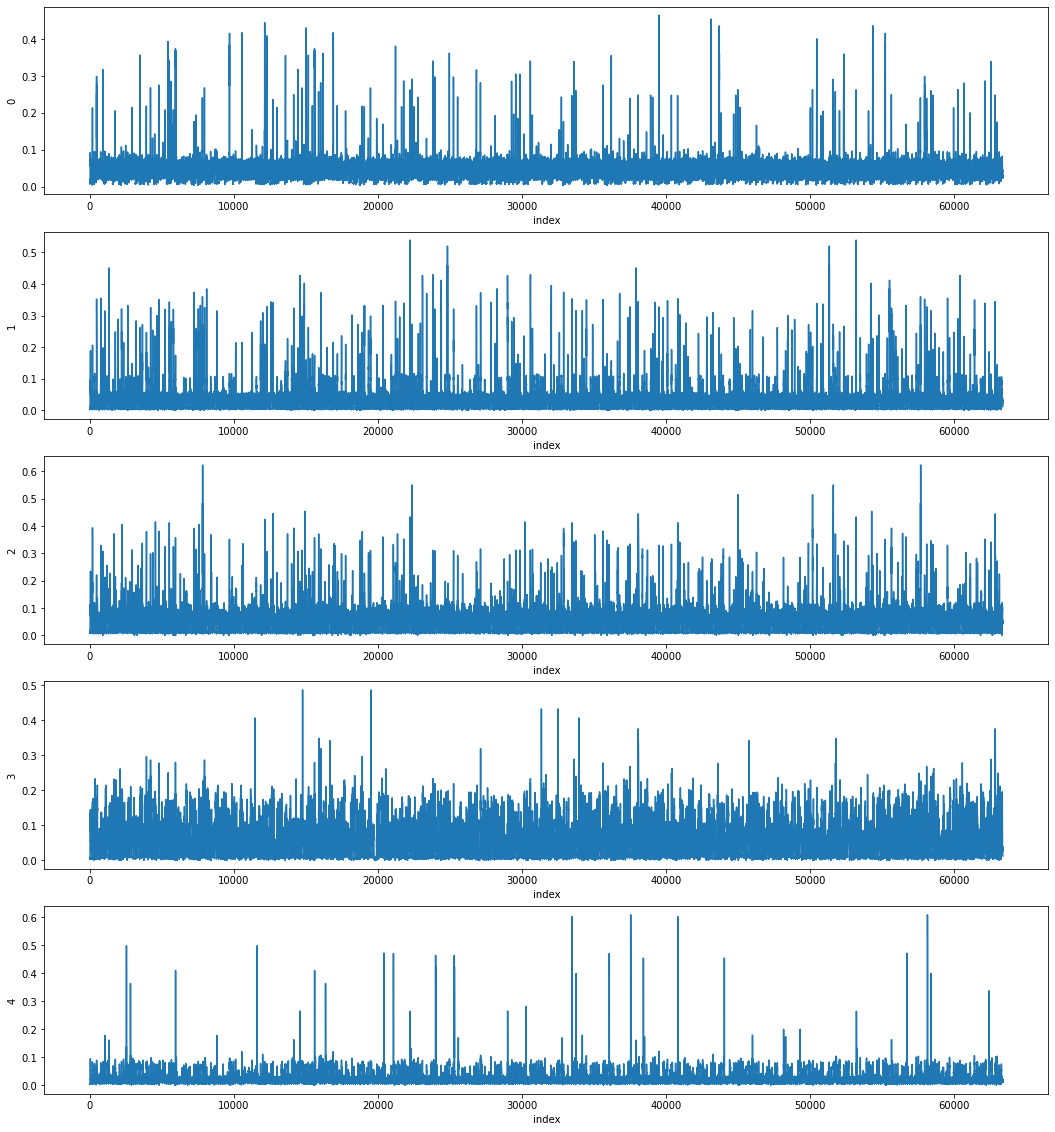

In [158]:
plot_time_series(df, columns=df.columns[:5])